**Proyecto PROMP**
**Uso de Chat Gpt para cumplir con la creación de un modelo VGG16 de clasificación de flores (Sunflower,Tulip,Rose), optimizado por SGD y Adam**

**Participantes**
Juan Camilo Angulo Acosta


In [ ]:
# Por la falta de conocimiento con el tema y la programación se uso chat GPT para entender un poco más que es un modelo VGG16

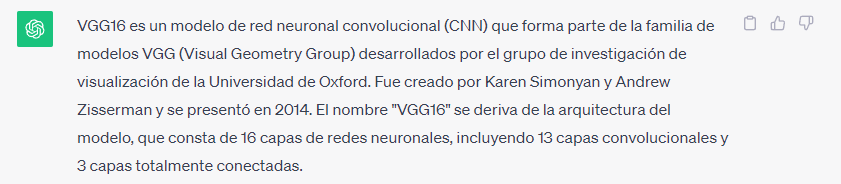

1. **Descargando Archivos**

In [1]:
# Despues De entender de que trata el ejercicio, se procedio a descargar los archivos sobre los cuales se debe realizar el modelo.
# estos fueron dados por el profesor.


In [1]:
!gdown 1fAMA1xnDDTZO1Xc5s3kdfuTEgDVSn7qk
!gdown 1xe7o34YULxmZvr5QaMt9x0sqHJqE3-Tp

Downloading...
From: https://drive.google.com/uc?id=1fAMA1xnDDTZO1Xc5s3kdfuTEgDVSn7qk
To: /content/flowers.zip
100% 150M/150M [00:02<00:00, 51.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xe7o34YULxmZvr5QaMt9x0sqHJqE3-Tp
To: /content/rose_test.jpeg
100% 270k/270k [00:00<00:00, 5.77MB/s]


In [ ]:
!unzip flowers.zip

Archive:  flowers.zip
   creating: sunflower/
  inflating: sunflower/1008566138_6927679c8a.jpg  
  inflating: sunflower/1022552002_2b93faf9e7_n.jpg  
  inflating: sunflower/1022552036_67d33d5bd8_n.jpg  
  inflating: sunflower/10386503264_e05387e1f7_m.jpg  
  inflating: sunflower/10386522775_4f8c616999_m.jpg  
  inflating: sunflower/10386525005_fd0b7d6c55_n.jpg  
  inflating: sunflower/10386525695_2c38fea555_n.jpg  
  inflating: sunflower/10386540106_1431e73086_m.jpg  
  inflating: sunflower/10386540696_0a95ee53a8_n.jpg  
  inflating: sunflower/10386702973_e74a34c806_n.jpg  
  inflating: sunflower/1043442695_4556c4c13d_n.jpg  
  inflating: sunflower/1044296388_912143e1d4.jpg  
  inflating: sunflower/10541580714_ff6b171abd_n.jpg  
  inflating: sunflower/1064662314_c5a7891b9f_m.jpg  
  inflating: sunflower/10862313945_e8ed9202d9_m.jpg  
  inflating: sunflower/11881770944_22b4f2f8f6_n.jpg  
  inflating: sunflower/1217254584_4b3028b93d.jpg  
  inflating: sunflower/12282924083_fb80aa17d4_n.j

2. **Importando Librerias**

In [ ]:
# Se Reviso que librerias se necesitaban para el modelo.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import SGD
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [ ]:
# El procesador de imagen se necesitaba con los siguientes parametros donde para saber que hace cada una de los items, se uso Chat GPT

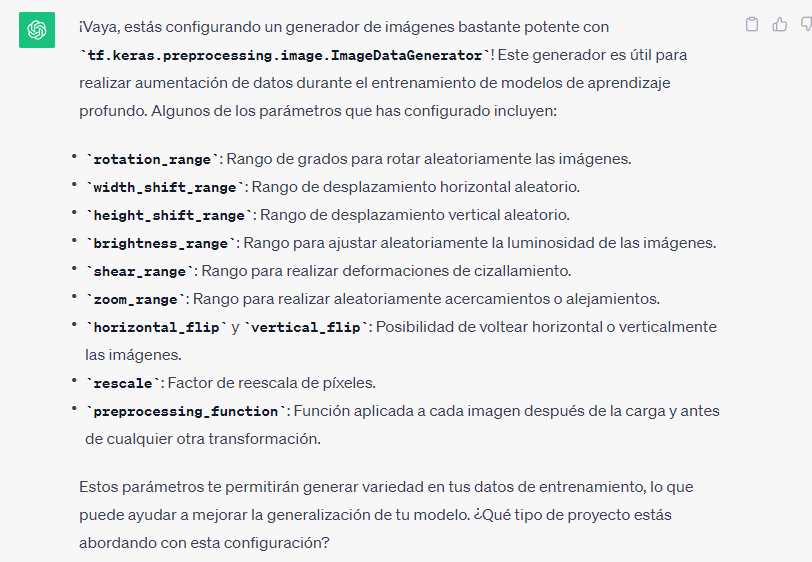

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.0,
    brightness_range=[0.1, 0.9],
    shear_range=0.0,
    zoom_range=[0.5, 1.5],
    channel_shift_range=150.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=[0,1],
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

3. **Preparación De La Data**

In [ ]:
# Se Muestran las paletas de colores que se usaran más adelante

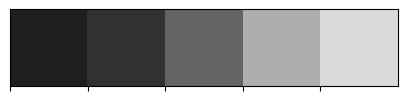

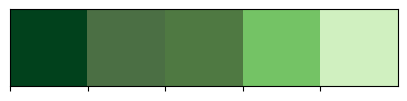

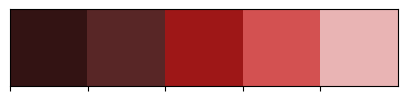

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

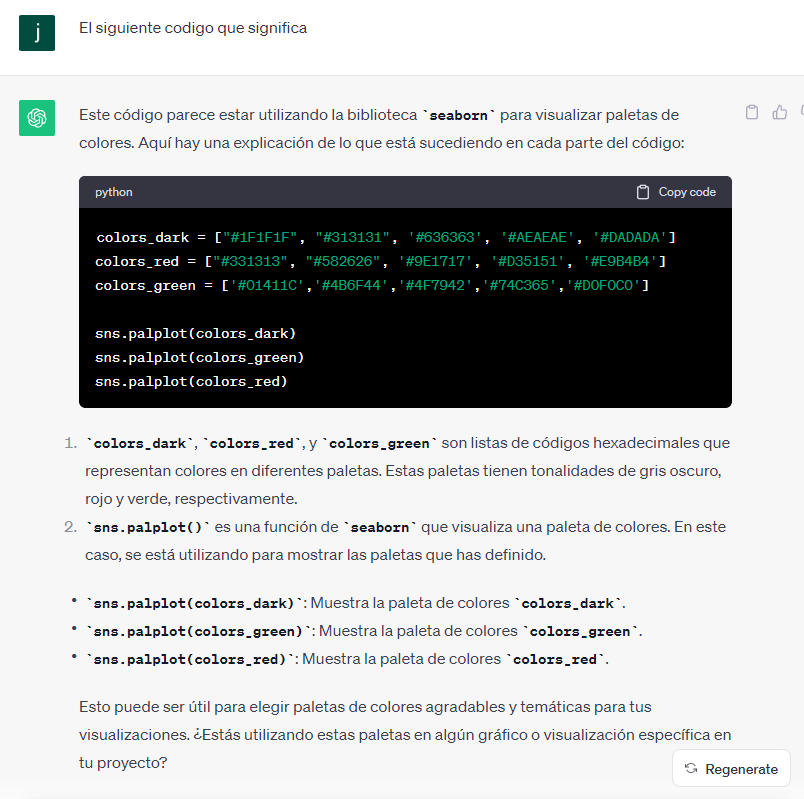

In [ ]:
# Se crea la lista con los respectivos nombres de cada flor

In [ ]:
flower_list = ['sunflower', 'tulip', 'rose']

In [ ]:
# Se organizaron las carpetas de las flores en una carpeta especifica para poder realizar el siguiente paso en el codigo

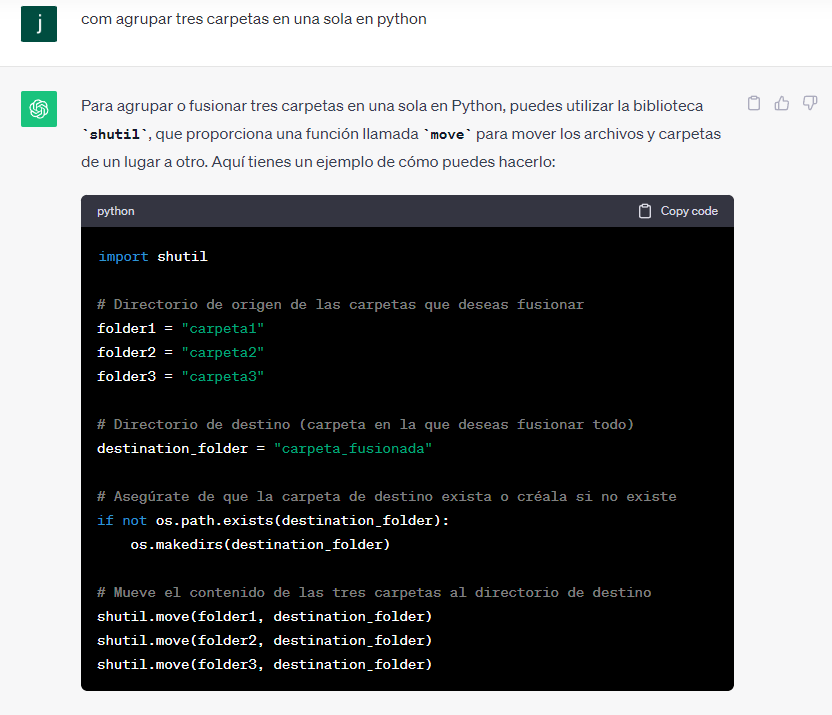

In [ ]:
import shutil

sunflower = "sunflower"
tulip = "tulip"
rose = "rose"

flowers = "flowers"

if not os.path.exists(flowers):
    os.makedirs(flowers)

shutil.move(sunflower, flowers)
shutil.move(tulip, flowers)
shutil.move(rose, flowers)

'flowers/rose'

In [ ]:
# Para la siguiente parte se busco entender que hacia a fondo el codigo y corregir ciertos errores que arrojaba.

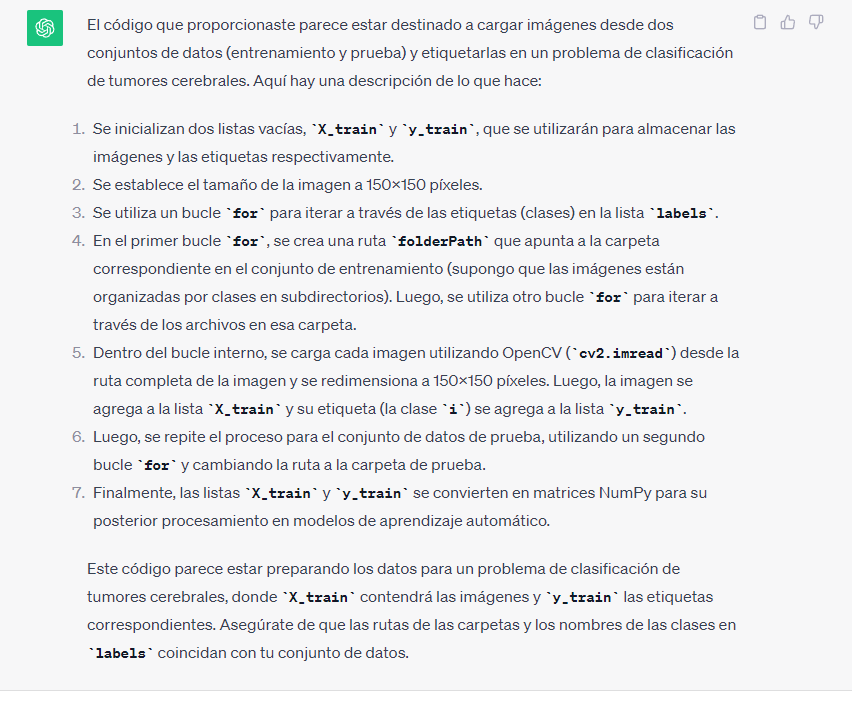

In [ ]:
X_train = []
y_train = []
image_size = 150

for i in flower_list:
    folderPath = os.path.join(flowers,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 784/784 [00:01<00:00, 465.82it/s]


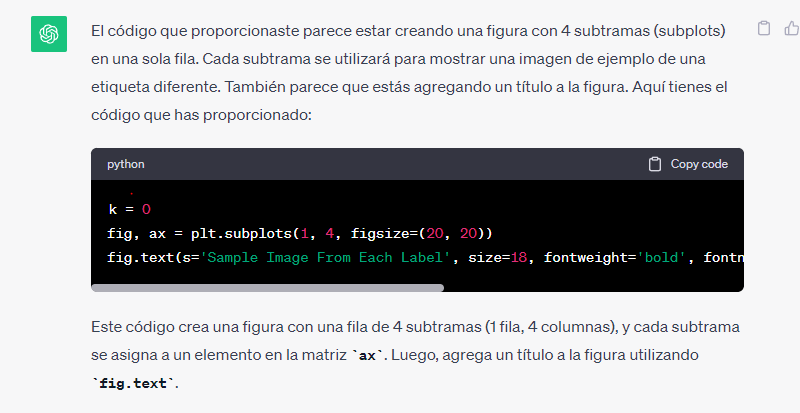

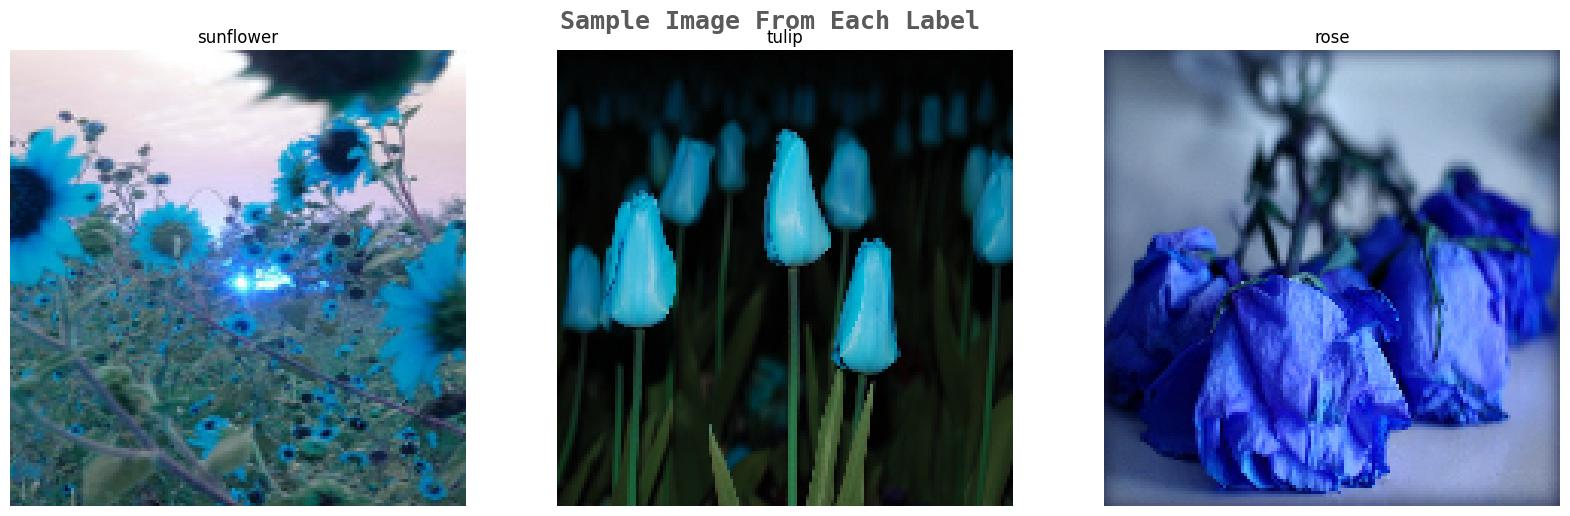

In [ ]:
k=0
fig, ax = plt.subplots(1,3,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in flower_list:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train.shape

(2501, 150, 150, 3)

4. **Diviendo La Data en Training y Test**

In [ ]:
#Los datos se preparan para ser entrenados y probados por porciones.

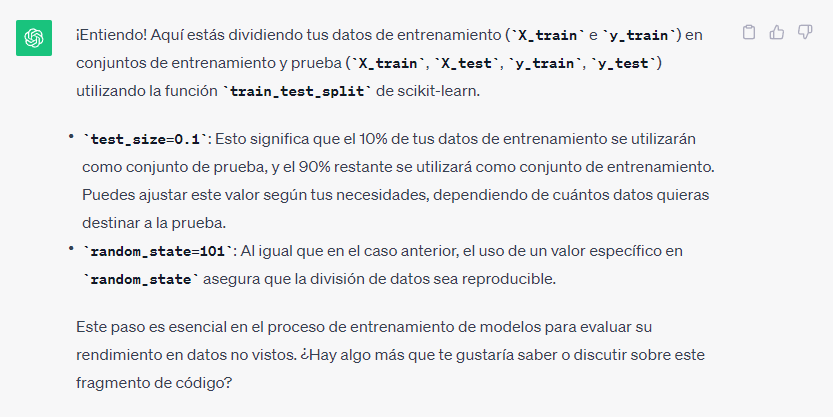

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(flower_list.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(flower_list.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

5. **Transferencia De Aprendizaje**  Fully Connected Part of the Network

In [ ]:
# Se Descarga y usa una arquitectura ya existente para nuestro modelo

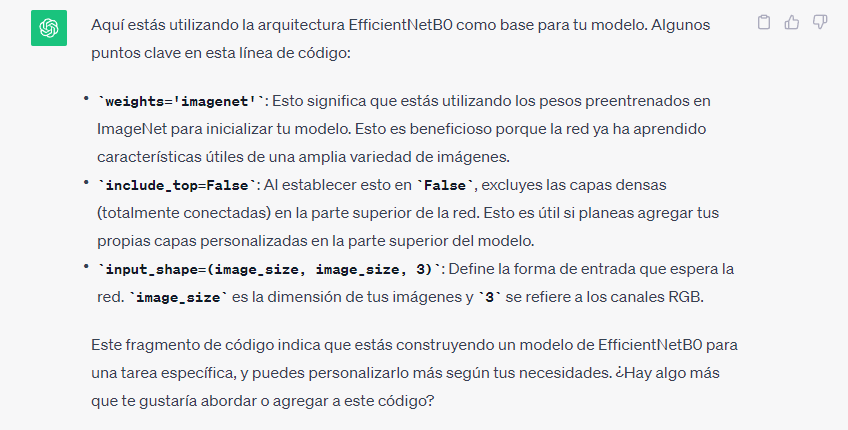

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# La siguiente parte fue vital para poder corregir el codigo, ya que nos daba el sigueinte error.

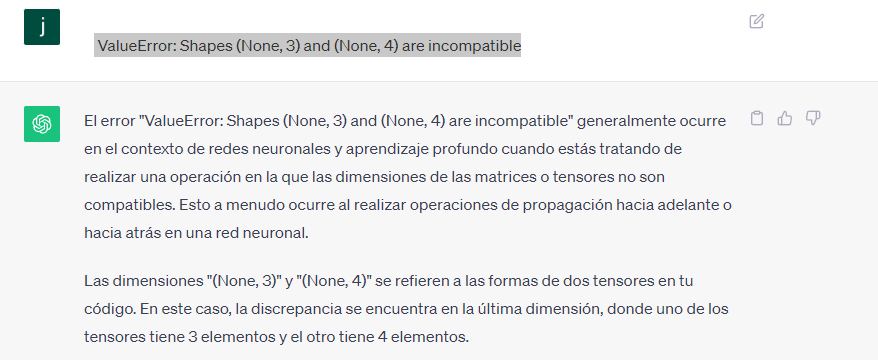

In [ ]:
# Donde se ve el numero 3 en el siguiente codigo hace referencia a la cantidad de neuronas (cantidad de calses) que tendra el modelo, el error al principio era que este tres no estaba y se estaba usando un modelo de 4 neuronas

In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(3,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0][0]']   

6. **Compilación Del Modelo**

In [ ]:
# Luego De todo el proceso pasado se compila el modelo y se define con que optimizador se va a realizar, en este caso tocaba por medio de SDG con unos parametros especificos que se usaron.

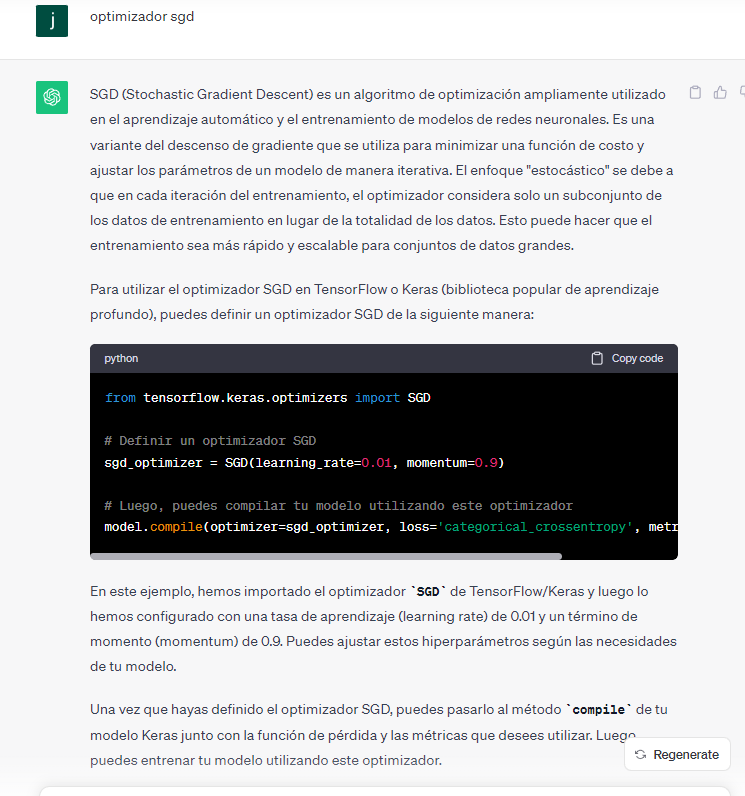

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'SGD', metrics= ['accuracy'])

In [ ]:
sgd_optimizer = SGD(learning_rate=0.0001, momentum=0.9)


In [ ]:
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.0001,
                              mode='auto',verbose=1)

7. **Entrenando El Modelo**

In [ ]:
# Se procede a aentrenar el modelo, se pregunto sobre todo sobre que eran las épocas sobre las cuales se entrenara el modelo.

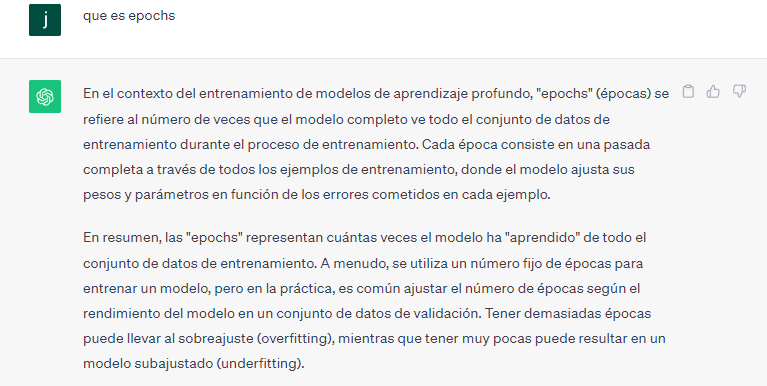

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
64/64 [==============================] - ETA: 0s - loss: 1.1931 - accuracy: 0.3595
Epoch 1: val_accuracy improved from -inf to 0.39111, saving model to effnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - 43s 202ms/step - loss: 1.1931 - accuracy: 0.3595 - val_loss: 1.0921 - val_accuracy: 0.3911 - lr: 1.0000e-04
Epoch 2/12
64/64 [==============================] - ETA: 0s - loss: 1.0813 - accuracy: 0.4395
Epoch 2: val_accuracy improved from 0.39111 to 0.53778, saving model to effnet.h5
64/64 [==============================] - 9s 139ms/step - loss: 1.0813 - accuracy: 0.4395 - val_loss: 0.9538 - val_accuracy: 0.5378 - lr: 1.0000e-04
Epoch 3/12
64/64 [==============================] - ETA: 0s - loss: 1.0085 - accuracy: 0.4775
Epoch 3: val_accuracy improved from 0.53778 to 0.60889, saving model to effnet.h5
64/64 [==============================] - 9s 142ms/step - loss: 1.0085 - accuracy: 0.4775 - val_loss: 0.8746 - val_accuracy: 0.6089 - lr: 1.0000e-04
Epoch 4/12
64/64 [==============================] - ETA: 0s - loss: 0.9260 - accuracy: 0.5679
Epoch 4: val_accuracy improved from 0.60889 to 0.66667, saving model to effnet.h5
64/64 [====================

In [ ]:
# Rendimiento del codigo a travez de varias epocas de entrenamiento

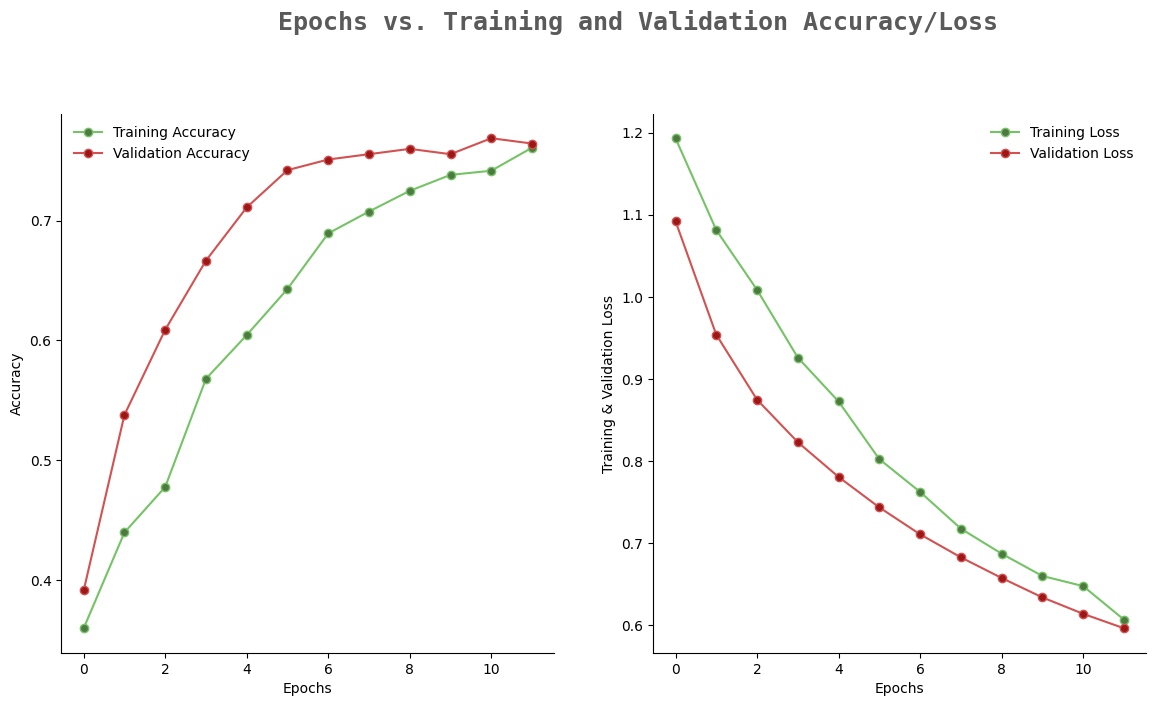

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

7. **Predicción**

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

8/8 [==============================] - 3s 151ms/step


In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        77
           1       0.69      0.73      0.71        96
           2       0.70      0.76      0.73        78

    accuracy                           0.73       251
   macro avg       0.74      0.73      0.74       251
weighted avg       0.74      0.73      0.73       251



In [ ]:
# Para poder entender como funiona un heat map se uso chat gpt

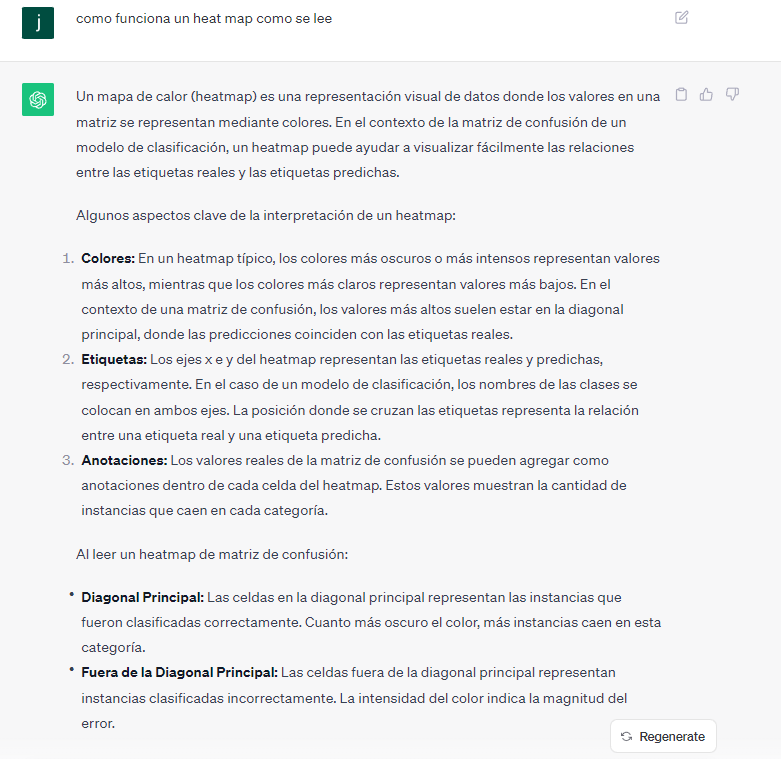

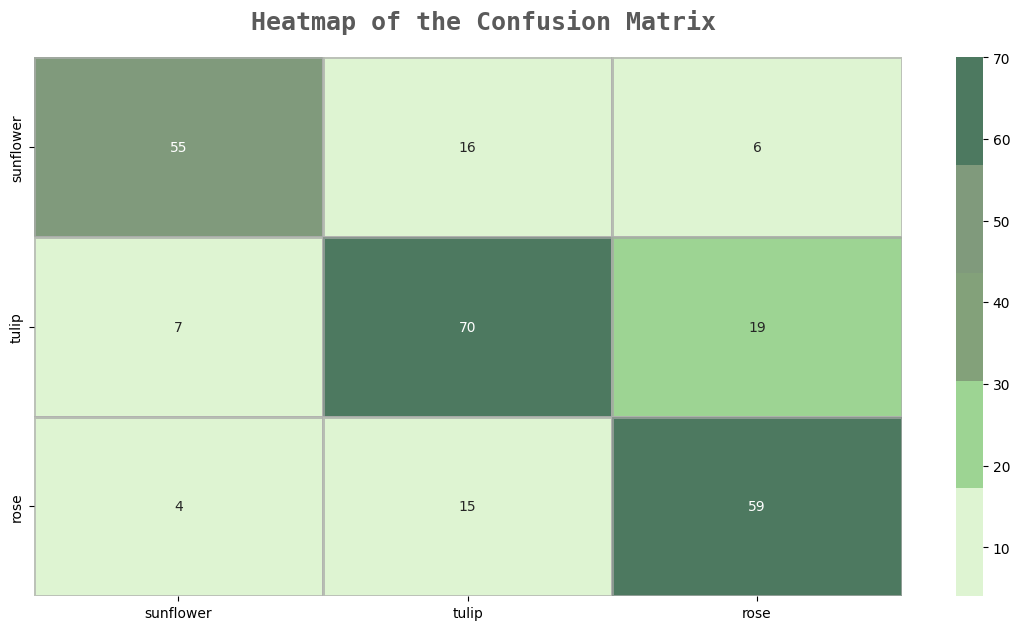

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=flower_list,yticklabels=flower_list,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

8. **Probar**

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='sunflower'
    elif p==1:
        print('tulip')
    elif p==2:
        p='rose'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)

        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])

9. **Guardar en archivo pickle**

In [ ]:
# Para guardar y cargar el modelo Pickle

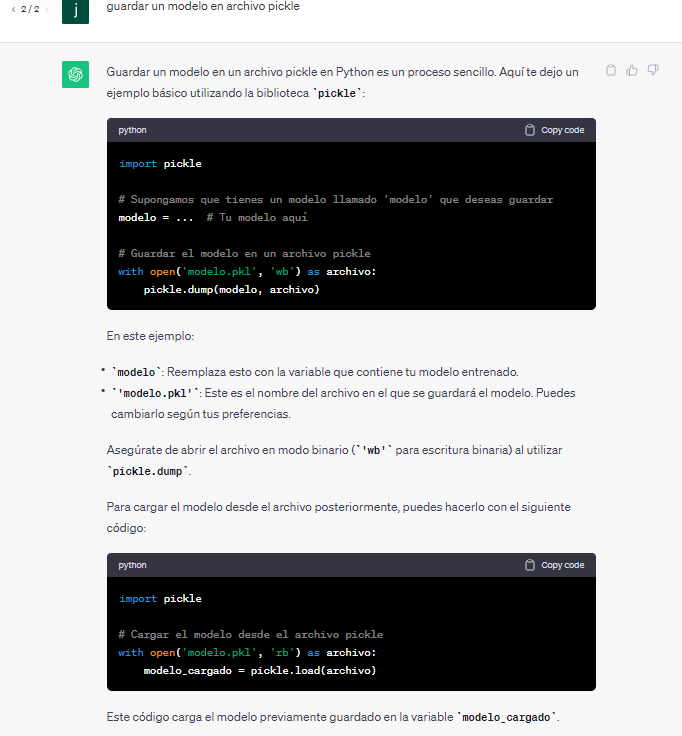

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

In [ ]:
model = RandomForestClassifier()


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
model_accuracy = model.score(X_test, y_test)

In [ ]:
print("Model Accuracy:" , model_accuracy * 100 , "%")

Model Accuracy: 32.27091633466135 %


In [ ]:
pickle.dump(model , open('model-flores.pk1' , 'wb'))

10. **Load Pickle**

In [ ]:
loaded_model = pickle.load(open('model-flores.pk1' , 'rb'))

In [ ]:
loaded_model_accuracy = loaded_model.score(X_test, y_test)

In [ ]:
print("Loaded Model Accuracy:" , loaded_model_accuracy * 100 , "%")

Loaded Model Accuracy: 32.27091633466135 %
